# SMS Spam Detection

This section explores the dataset to gain insights, identify patterns, and detect missing values or outliers before preprocessing. The SMS Spam Collection dataset is chosen for its relevance and simplicity for text classification tasks.


## Loading the Dataset
We load the dataset and inspect the first few rows to understand its structure.


In [37]:
import pandas as pd


df = pd.read_csv('../dataset/spam.csv', encoding='latin-1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


As we can see, there are four columns, but the last three columns have only few non null values. We are going to see what are their role and how can they be used.

In [38]:
print(df[df['Unnamed: 2'].notnull()].iloc[:5])

       v1                                                 v2  \
95   spam  Your free ringtone is waiting to be collected....   
281   ham                                \Wen u miss someone   
444   ham  \HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...   
671  spam         SMS. ac sun0819 posts HELLO:\You seem cool   
710   ham  Height of Confidence: All the Aeronautics prof...   

                                            Unnamed: 2             Unnamed: 3  \
95                                         PO Box 5249   MK17 92H. 450Ppw 16"   
281   the person is definitely special for u..... B...       why to miss them   
444   HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...                    NaN   
671   wanted to say hi. HI!!!\" Stop? Send STOP to ...                    NaN   
710    this wont even start........ Datz confidence.."                    NaN   

                         Unnamed: 4  
95                              NaN  
281   just Keep-in-touch\" gdeve.."  
444           

Due to lack of information and correlation between the text column and the last two columns, it is the best to drop them and focus on the text column.

In [39]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'text']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [40]:
import matplotlib.pyplot as plt

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

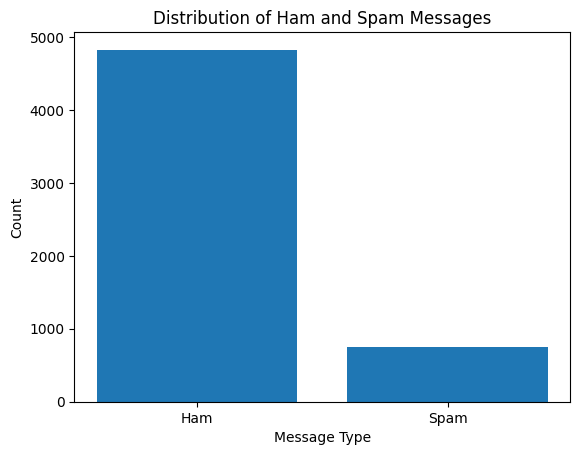

In [41]:
import matplotlib.pyplot as plt

x_values = ['Ham', 'Spam']
y_values = df['label'].value_counts().values
plt.bar(x_values, y_values)
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')
plt.show()


The dataset is clearly imbalanced, which can negatively impact model performance. There are several techniques to address this issue, and for a thorough evaluation, I will experiment with all of them.
* Oversampling : Oversampling is the process of adding more copies to the minority class.
* SMOTE : SMOTE is used to generate artificial/synthetic samples for the minority class. This technique works by randomly choosing a sample from a minority class and determining K-Nearest Neighbors for this sample, then the artificial sample is added between the picked sample and its neighbors. This function is present in imblearn module.



In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
def clean_text(text):
    text = text.lower() # lowercase
    text = ' '.join([word for word in text.split() if word.isalpha() and word not in stopwords.words('english')]) # remove stopwords (a, an, the, is, are, ...) and non-alphabetic characters (numbers, punctuation, ...)
    return text


df['clean_text'] = df['text'].apply(clean_text)
print(df[['text', 'clean_text']].head())

from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
X_vectorized = tfid.fit_transform(df['clean_text'])
print(X_vectorized.shape)  # (num_samples, num_features)


[nltk_data] Downloading package stopwords to /home/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  go jurong available bugis n great world la e c...  
1                                    ok joking wif u  
2  free entry wkly comp win fa cup final tkts may...  
3                        u dun say early u c already  
4                 nah think goes lives around though  
(5572, 9400)


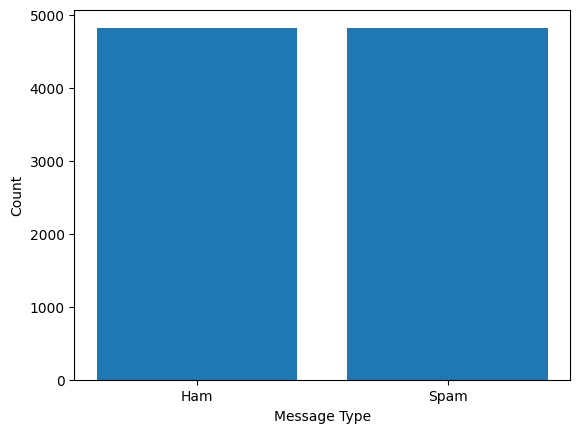

(9650, 9400)
(9650,)


In [59]:
# Over-sampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_vectorized, df['label'])

x_values = ['Ham', 'Spam']
y_values = y_resampled.value_counts().values
plt.bar(x_values, y_values)
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()
print(X_resampled.shape)  # (num_samples, num_features)
print(y_resampled.shape)  # (num_samples,)

df_X_over = pd.DataFrame(X_resampled.toarray(), columns=tfid.get_feature_names_out())
df_y_over = pd.DataFrame(y_resampled, columns=['label'])
df_over = pd.concat([df_X_over, df_y_over], axis=1)

df_over.to_csv('../dataset/spam_over.csv', index=False)

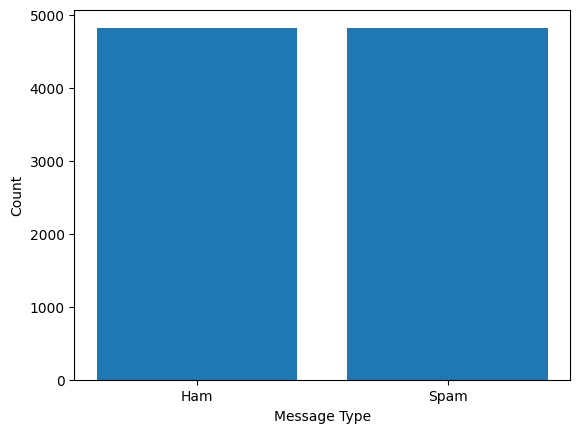

(9650, 9400)
(9650,)


In [60]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_smote, y_smote = smote.fit_resample(X_vectorized, df['label'])

x_values = ["Ham", "Spam"]
y_values = y_smote.value_counts().values
plt.bar(x_values, y_values)
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()
print(X_smote.shape)  # (num_samples, num_features)
print(y_smote.shape)  # (num_samples,)


# Convert X_smote to DataFrame
df_X_smote = pd.DataFrame(X_smote.toarray(), columns=tfid.get_feature_names_out())
df_smote = pd.concat([df_X_smote, y_smote.reset_index(drop=True)], axis=1)
df_smote.to_csv('../dataset/spam_smote.csv', index=False)